In [1]:
import pandas as pd
import numpy as np
from nltk.stem import *
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures, TrigramCollocationFinder, TrigramAssocMeasures
import matplotlib.pyplot as plt

For this morning's task, we will be working with policy text scraped from the Warren and Sanders campaigns.  

In [2]:
# Import the data from the data folder. 
# We will be working mainly with the 'Policy' feature

df = pd.read_csv('data/2020_policies_feb_24.csv')
df.policy

0      As published on Medium on September 3rd, 2019:...
1      Small businesses are the heart of our economy....
2      As published on Medium on July 11th, 2019:\nIm...
3      Working families all across the country are ge...
4      I attended public school growing up in Oklahom...
                             ...                        
184                  A Commitment to America's Heartland
185                   Dignity and Security in Retirement
186    Small-donor matching system for federal electi...
187            Our Shared Duty: Serving Those Who Served
188    A 21st Century Voting Rights Act to end all ty...
Name: policy, Length: 189, dtype: object

# Question set 1:
After remove punctuation and ridding the text of numbers and other low semantic value text, answer the following questions.

1. Which document has the greatest average word length?
2. What is the average word length of the entire corpus?
3. Which is greater, the average word length for the documents in the Warren or Sanders campaigns? 

For each question set, Slack out your answers, which will vary depending on which preprocessing choices you make.

In [3]:
# Q1 (your answers may vary based on the type of preprocessing steps you took)
from nltk import regexp_tokenize

pattern = r'[A-Za-z]\w+'

# use regex expression to select words, get rid of punctuation and numbers
token_policy = [regexp_tokenize(policy, pattern) for policy in df.policy]

avg_lengths = []
for doc in token_policy:
    word_lengths = sum([len(word) for word in doc])
    avg_lengths.append(word_lengths/len(doc))
    
longest = sorted(avg_lengths, reverse=True)[0]
print(f'''The text of the document with the greatest word length is:
      {df.iloc[avg_lengths.index(longest)].policy}''')

The text of the document with the greatest word length is:
      Establish independent, statewide redistricting commissions.


In [4]:
# 2 Average Word Length
total_tokens = []

for doc in token_policy:
    total_tokens.extend([len(word) for word in doc])
print(f'''Avg. word length across all docs: 
      {sum(total_tokens)/len(total_tokens)}''')

Avg. word length across all docs: 
      5.373398604619577


In [5]:
# 3 Greater avg word length

warren_policies = df[df.candidate=='warren'].policy

token_warren= [regexp_tokenize(policy, pattern) for policy in warren_policies] 


warren_lengths = []
for doc in token_warren:
    word_lengths = sum([len(word) for word in doc])
    warren_lengths.append(word_lengths/len(doc))
 
print(f"avg length of warren: {sum(warren_lengths)/len(warren_lengths)}")

sanders_policies = df[df.candidate=='sanders'].policy

token_sanders= [regexp_tokenize(policy, pattern) for policy in sanders_policies] 

sanders_lengths = []
for doc in token_sanders:
    word_lengths = sum([len(word) for word in doc])
    sanders_lengths.append(word_lengths/len(doc))
 
print(f"avg length of sanders: {sum(sanders_lengths)/len(sanders_lengths)}")
print('Warren has the greater average word length')

avg length of warren: 5.3276878632879585
avg length of sanders: 5.274844434862794
Warren has the greater average word length


Proceed through the remaining standard preprocessing steps in whatever manner you see fit. Make sure to:
- Make text lowercase
- Remove stopwords
- Stem or lemmatize

# Question set 2:
1. What are the most common words across the corpus?
2. What are the most common words across each campaign?

> in order to answer these questions, you may find the nltk FreqDist function helpful.

3. Use the FreqDist plot method to make a frequency plot for the corpus as a whole.  
4. Based on that plot, should any more words be added to our stopword library?


In [6]:
# 2.1 
all_words = []
for doc in token_policy:
    all_words.extend([word.lower() for word in doc])

all_words = [word for word in all_words if word not in stopwords.words('english')]

p_stem = PorterStemmer()
all_words_stemmed = [p_stem.stem(word) for word in all_words]

# Two ways of doing it. Find the most common word:
words, count = np.unique(all_words_stemmed, return_counts=True)
word_count_ind = np.argsort(-count)
print(words[word_count_ind[0]])

# or use FreqDist to find most common words
print(FreqDist(all_words_stemmed).most_common(10))

feder
[('feder', 1341), ('peopl', 1305), ('commun', 1230), ('care', 1202), ('make', 1191), ('american', 1180), ('health', 1080), ('program', 1066), ('provid', 1061), ('state', 1043)]


In [7]:
# 2.2 

# most common words Warren
token_warren= [regexp_tokenize(policy, pattern) for policy in warren_policies] 
all_warren = []
for doc in token_warren:
    all_warren.extend([word.lower() for word in doc])
all_warren = [word for word in all_warren if word not in stopwords.words('english')]
fd_warren = FreqDist(all_warren)
print(fd_warren.most_common(10))


[('federal', 860), ('people', 691), ('health', 656), ('also', 630), ('care', 621), ('plan', 610), ('new', 601), ('public', 547), ('government', 543), ('make', 527)]


In [8]:
# most common words Sanders
token_sanders= [regexp_tokenize(policy, pattern) for policy in sanders_policies] 
all_sanders = []
for doc in token_sanders:
    all_sanders.extend([word.lower() for word in doc])
all_sanders = [word for word in all_sanders if word not in stopwords.words('english')]
fd_sanders = FreqDist(all_sanders)
print(fd_sanders.most_common(10))


[('people', 429), ('ensure', 364), ('bernie', 357), ('care', 324), ('disabilities', 292), ('percent', 277), ('workers', 264), ('federal', 235), ('provide', 224), ('president', 214)]


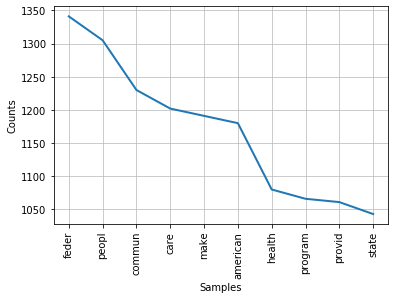

In [9]:
2.3
# frequency plot for all campaign words
fd_campaigns = FreqDist(all_words_stemmed)
fd_campaigns.plot(10)


In [10]:
# 2.4
# It looks like 'make', 'also', 'Bernie' should be added to the stopword list. 

# Question set 3:

1. What are the most common bigrams in the corpus?
2. What are the most common bigrams in the Warren campain and the Sanders campaign, respectively?
3. Answer questions 1 and 2 for trigrams.

> Hint: You may find it useful to leverage the nltk.collocations functions

In [11]:
# 3.1 most common bigrams
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_words_stemmed)
print(sorted(finder.nbest(bigram_measures.raw_freq, 2)))



[('health', 'care'), ('senat', 'klobuchar')]


In [12]:
# 3.2 bigrams for Warren/Sanders

all_warren_stemmed = [p_stem.stem(word) for word in all_warren]
finder = BigramCollocationFinder.from_words(all_warren_stemmed)
print(sorted(finder.nbest(bigram_measures.raw_freq, 2)))

all_sanders_stemmed = [p_stem.stem(word) for word in all_sanders]
finder = BigramCollocationFinder.from_words(all_sanders_stemmed)
print(sorted(finder.nbest(bigram_measures.raw_freq, 2)))


[('feder', 'govern'), ('health', 'care')]
[('peopl', 'disabl'), ('presid', 'berni')]


In [13]:
# 3.3 Trigrams

trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(all_warren_stemmed)
print(sorted(finder.nbest(trigram_measures.raw_freq, 2)))

finder = TrigramCollocationFinder.from_words(all_sanders_stemmed)
print(sorted(finder.nbest(trigram_measures.raw_freq, 2)))


[('actblu', 'express', 'donat'), ('email', 'zip', 'submit')]
[('green', 'new', 'deal'), ('key', 'point', 'detail')]


In [14]:
# those tri-grams expose some other stopwords that we should probably deal with
